In [2]:
# IMPORTING CSV FILES OF PROBLEM STATEMENT
from google.colab import files


uploaded = files.upload()


Saving training_set_features.csv to training_set_features.csv


In [4]:
from google.colab import files


uploaded = files.upload()


Saving test_set_features.csv to test_set_features.csv


In [5]:
# IMPORTING NECCESARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
!pip install scikit-learn

In [7]:
#DF----> IT IS THE DATAFRAME CONSISTING OF TRAINING SET FEATURES DATASET
#DF----> IT IS THE DATAFRAME CONSISTING OF TESTING SET FEATURES DATASET
df=pd.read_csv("training_set_features.csv")
df_test=pd.read_csv("test_set_features.csv")


**#A QUICK SKIM THROUGH OUR DATASET**


In [8]:

print(df.sample(6))

       respondent_id  xyz_concern  xyz_knowledge  behavioral_antiviral_meds  \
15445          15445          1.0            2.0                        0.0   
12282          12282          2.0            2.0                        0.0   
11841          11841          2.0            0.0                        0.0   
4860            4860          1.0            2.0                        0.0   
19964          19964          2.0            2.0                        0.0   
23421          23421          2.0            1.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
15445                   0.0                   0.0                    1.0   
12282                   1.0                   0.0                    1.0   
11841                   0.0                   0.0                    0.0   
4860                    1.0                   0.0                    1.0   
19964                   1.0                   0.0                 

**PRE-PROCESSING OR PREPARING DATA FOR ANLYSIS,APPLYING SIMULTANEOUSLY SAME OPERATIONS TO BOTH TRAINING AND TESTING FEATURES DATASET**

In [9]:
#APPLYING ON DF
print(df.info())
print("...............................................................")
print(df.shape)
print("...............................................................")
print(df.isnull().sum())

#APPLYING THE SAME ON DF_TEST

print(df_test.info())
print("...............................................................")
print(df_test.shape)
print("...............................................................")
print(df_test.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

**REDUCING NUMBER OF CATEGORIES, FOR EXAMPLE MEANING OF 0,1 IS SIMILAR(SAME AS NOT SO CONCERNED) AND MEANING OF 2,3 IS SIMILAR(SAME AS THERE IS GOOD DEGREE OF CONCERN) **

In [10]:
#APPLYING TO DF
df["xyz_concern"][(df["xyz_concern"]==0) | (df["xyz_concern"]==1)]=0
df["xyz_concern"][(df["xyz_concern"]==2) | (df["xyz_concern"]==3)]=1

#APPLYING TO DF_TEST
df_test["xyz_concern"][(df_test["xyz_concern"]==0) | (df_test["xyz_concern"]==1)]=0
df_test["xyz_concern"][(df_test["xyz_concern"]==2) | (df_test["xyz_concern"]==3)]=1

<ipython-input-10-3f927512d529>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["xyz_concern"][(df["xyz_concern"]==0) | (df["xyz_concern"]==1)]=0
<ipython-input-10-3f927512d529>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["xyz_concern"][(df["xyz_concern"]==2) | (df["xyz_concern"]==3)]=1
<ipython-input-10-3f927512d529>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["xyz_concern"][(df_test["xyz_concern"]==0) | (df_t

In [11]:
df["xyz_knowledge"][(df["xyz_knowledge"]==1) | (df["xyz_knowledge"]==2)]=1
df["xyz_knowledge"][(df["xyz_knowledge"]==1) | (df["xyz_knowledge"]==2)]=1

df_test["xyz_knowledge"][(df_test["xyz_knowledge"]==1) | (df_test["xyz_knowledge"]==2)]=1
df_test["xyz_knowledge"][(df_test["xyz_knowledge"]==1) | (df_test["xyz_knowledge"]==2)]=1



<ipython-input-11-133d5de037ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["xyz_knowledge"][(df["xyz_knowledge"]==1) | (df["xyz_knowledge"]==2)]=1
<ipython-input-11-133d5de037ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["xyz_knowledge"][(df["xyz_knowledge"]==1) | (df["xyz_knowledge"]==2)]=1
<ipython-input-11-133d5de037ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["xyz_knowledge"][(df_test["xyz_knowled

**SKIMMING THROUGH EACH AND EVERY FEATURE ON BOTH DATAFRAMES**

In [85]:
for column in df.columns:
    print(f"Column: {column}")
    print(df[column].head(5))
    print("\n")

print(".........................................................................")


for columns in df_test.columns:
    print(f"Column: {columns}")
    print(df_test[columns].head(5))
    print("\n")


Column: respondent_id
0    0
1    1
2    2
3    3
4    4
Name: respondent_id, dtype: int64


Column: xyz_knowledge
0    0.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: xyz_knowledge, dtype: float64


Column: behavioral_antiviral_meds
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: behavioral_antiviral_meds, dtype: float64


Column: behavioral_avoidance
0    0.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: behavioral_avoidance, dtype: float64


Column: behavioral_face_mask
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: behavioral_face_mask, dtype: float64


Column: behavioral_wash_hands
0    0.0
1    1.0
2    0.0
3    1.0
4    1.0
Name: behavioral_wash_hands, dtype: float64


Column: behavioral_large_gatherings
0    0.0
1    0.0
2    0.0
3    1.0
4    1.0
Name: behavioral_large_gatherings, dtype: float64


Column: behavioral_outside_home
0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: behavioral_outside_home, dtype: float64


Column: behavioral_touch_face
0    1.0
1    1.0
2    0.0

**HOW DOES OUR DATA LOOK LIKE**

In [86]:
print(df.head(6))
print("**************************************************************************************")
print(df.tail(6))#how various values are distributed an overall lookup from below the column
print("***************************************************************************************")
print(df.sample(4))
print("***************************************************************************************")
print(df.columns) #names of all columns present in dataframe
print("**************************************************************************************")
print(df.info()) #info about overall structure of dataframe , non-null columns , no of null values etc.
print("***************************************************************************************")
print(df.describe())
print("****************************************************************************************")
print(df.shape) #skeleton of dataframe
print("****************************************************************************************")
print(df.dtypes)
print("****************************************************************************************")
print(df.isnull().sum()) #no of null values in a column


print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")


#APPLYING SAME TO DF_TEST
print(df_test.head(6))
print("**************************************************************************************")
print(df_test.tail(6))#how various values are distributed an overall lookup from below the column
print("***************************************************************************************")
print(df_test.sample(4))
print("***************************************************************************************")
print(df_test.columns) #names of all columns present in dataframe
print("**************************************************************************************")
print(df_test.info()) #info about overall structure of dataframe , non-null columns , no of null values etc.
print("***************************************************************************************")
print(df_test.describe())
print("****************************************************************************************")
print(df_test.shape) #skeleton of dataframe
print("****************************************************************************************")
print(df_test.dtypes)
print("****************************************************************************************")
print(df_test.isnull().sum()) #no of null values in a column


   respondent_id  xyz_knowledge  behavioral_antiviral_meds  \
0              0            0.0                        0.0   
1              1            1.0                        0.0   
2              2            1.0                        0.0   
3              3            1.0                        0.0   
4              4            1.0                        0.0   
5              5            1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   
5                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0

**DISPLAYING UNIQUE CATEGORIES IN EACH CATEGORICAL FEATURE AND THE COUNTS OF THOSE CATEGORIES PRSENT IN EACH COLOUMN, IT HELPS TO UNDERSTAND HOW DATA POINTS MAY E ENCODED AND HOW TARGET FEATURE RELATED WITH VARIOUS TYPES OF CATEGORIES * **bold text**

In [14]:
for col in df.columns:
  print(df[col].value_counts())
  print("\n")
print(".............................................................")
for cols in df_test.columns:
  print(df_test[cols].value_counts())
  print("\n")

respondent_id
0        1
17736    1
17812    1
17811    1
17810    1
        ..
8898     1
8897     1
8896     1
8895     1
26706    1
Name: count, Length: 26707, dtype: int64


xyz_concern
1.0    15166
0.0    11449
Name: count, dtype: int64


xyz_knowledge
1.0    24085
0.0     2506
Name: count, dtype: int64


behavioral_antiviral_meds
0.0    25335
1.0     1301
Name: count, dtype: int64


behavioral_avoidance
1.0    19228
0.0     7271
Name: count, dtype: int64


behavioral_face_mask
0.0    24847
1.0     1841
Name: count, dtype: int64


behavioral_wash_hands
1.0    22015
0.0     4650
Name: count, dtype: int64


behavioral_large_gatherings
0.0    17073
1.0     9547
Name: count, dtype: int64


behavioral_outside_home
0.0    17644
1.0     8981
Name: count, dtype: int64


behavioral_touch_face
1.0    18001
0.0     8578
Name: count, dtype: int64


doctor_recc_xyz
0.0    19139
1.0     5408
Name: count, dtype: int64


doctor_recc_seasonal
0.0    16453
1.0     8094
Name: count, dtype: int64


c

**viewing columns**

In [15]:
print(df.columns)
print("...................................................")
print(df_test.columns)


Index(['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')
Index(['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'b

**After checking occurences of categories in features, filling missing values with mot frequent occurences**

In [16]:

from sklearn.impute import SimpleImputer

# Specifying the columns to be imputed
columns_to_impute = ['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
                     'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
                     'behavioral_large_gatherings', 'behavioral_outside_home',
                     'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
                     'chronic_med_condition', 'child_under_6_months', 'health_worker']

# Creating an imputer object with strategy='most_frequent' to replace missing values with the mode
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Fit the imputer on the specified columns of the DataFrame and transform the data
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

print(df.info())

print("..................................................................................")

from sklearn.impute import SimpleImputer

# Specify the columns to be imputed
columns_to_impute = ['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
                     'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
                     'behavioral_large_gatherings', 'behavioral_outside_home',
                     'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
                     'chronic_med_condition', 'child_under_6_months', 'health_worker']

# Create an imputer object with strategy='most_frequent' to replace missing values with the mode
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Fit the imputer on the specified columns of the DataFrame and transform the data
df_test[columns_to_impute] = imputer.fit_transform(df_test[columns_to_impute])

print(df_test.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26707 non-null  float64
 2   xyz_knowledge                26707 non-null  float64
 3   behavioral_antiviral_meds    26707 non-null  float64
 4   behavioral_avoidance         26707 non-null  float64
 5   behavioral_face_mask         26707 non-null  float64
 6   behavioral_wash_hands        26707 non-null  float64
 7   behavioral_large_gatherings  26707 non-null  float64
 8   behavioral_outside_home      26707 non-null  float64
 9   behavioral_touch_face        26707 non-null  float64
 10  doctor_recc_xyz              26707 non-null  float64
 11  doctor_recc_seasonal         26707 non-null  float64
 12  chronic_med_condition        26707 non-null  float64
 13  child_under_6_mo

**HEALTH_INSURANCE FEATURE HAS A GOOD NUMBER OF MISSING VALUES SO TAKING MEAN OF (MEAN,MODE,MEDIAN) FOR GETTING NEAREST TYPE SUBSTITUTION**

In [17]:
non_nan_values = df['health_insurance'].dropna()

mean_value = non_nan_values.mean()
median_value = non_nan_values.median()
mode_value = non_nan_values.mode().mean()  # mode() can return multiple values; take the mean of modes

# Compute the average of mean, mode, and median
replacement_value = (mean_value + median_value + mode_value) / 3

# Replace NaN values with this computed average
df['health_insurance'].fillna(replacement_value, inplace=True)

print(".................................................................................")
non_nan_values = df_test['health_insurance'].dropna()

mean_value = non_nan_values.mean()
median_value = non_nan_values.median()
mode_value = non_nan_values.mode().mean()  # mode() can return multiple values; take the mean of modes

# Compute the average of mean, mode, and median
replacement_value = (mean_value + median_value + mode_value) / 3

# Replace NaN values with this computed average
df_test['health_insurance'].fillna(replacement_value, inplace=True)

df["health_insurance"]=df["health_insurance"].round(0)
df_test["health_insurance"]=df_test["health_insurance"].round(0)


In [18]:
print(df.info())
print("...................................................................")
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26707 non-null  float64
 2   xyz_knowledge                26707 non-null  float64
 3   behavioral_antiviral_meds    26707 non-null  float64
 4   behavioral_avoidance         26707 non-null  float64
 5   behavioral_face_mask         26707 non-null  float64
 6   behavioral_wash_hands        26707 non-null  float64
 7   behavioral_large_gatherings  26707 non-null  float64
 8   behavioral_outside_home      26707 non-null  float64
 9   behavioral_touch_face        26707 non-null  float64
 10  doctor_recc_xyz              26707 non-null  float64
 11  doctor_recc_seasonal         26707 non-null  float64
 12  chronic_med_condition        26707 non-null  float64
 13  child_under_6_mo

**BELOW TWO FEATURES WORKED UPON SEEMED VERY NEAR IN MEANING SO CHECKING CORRELATION WITH EACH OTHER AND CREATING A NEW FEATURE BY COLUMN WISE MEAN OF THE TWO FEATURES ** ****

In [19]:
print(df.corr(numeric_only=True)['opinion_xyz_risk'])
print()
print(df.corr(numeric_only=True)["opinion_seas_risk"])

print(df_test.corr(numeric_only=True)['opinion_xyz_risk'])
print()
print(df_test.corr(numeric_only=True)["opinion_seas_risk"])

respondent_id                  0.000958
xyz_concern                    0.329726
xyz_knowledge                  0.022860
behavioral_antiviral_meds      0.104829
behavioral_avoidance           0.116690
behavioral_face_mask           0.131035
behavioral_wash_hands          0.168592
behavioral_large_gatherings    0.126428
behavioral_outside_home        0.124954
behavioral_touch_face          0.145383
doctor_recc_xyz                0.248108
doctor_recc_seasonal           0.156564
chronic_med_condition          0.120215
child_under_6_months           0.086077
health_worker                  0.123062
health_insurance               0.015095
opinion_xyz_vacc_effective     0.261304
opinion_xyz_risk               1.000000
opinion_xyz_sick_from_vacc     0.335062
opinion_seas_vacc_effective    0.224469
opinion_seas_risk              0.564208
opinion_seas_sick_from_vacc    0.198601
household_adults               0.030181
household_children             0.095325
Name: opinion_xyz_risk, dtype: float64



In [21]:
print(df.info())
print(".........................................................................")
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26707 non-null  float64
 2   xyz_knowledge                26707 non-null  float64
 3   behavioral_antiviral_meds    26707 non-null  float64
 4   behavioral_avoidance         26707 non-null  float64
 5   behavioral_face_mask         26707 non-null  float64
 6   behavioral_wash_hands        26707 non-null  float64
 7   behavioral_large_gatherings  26707 non-null  float64
 8   behavioral_outside_home      26707 non-null  float64
 9   behavioral_touch_face        26707 non-null  float64
 10  doctor_recc_xyz              26707 non-null  float64
 11  doctor_recc_seasonal         26707 non-null  float64
 12  chronic_med_condition        26707 non-null  float64
 13  child_under_6_mo

In [22]:
print(df[['opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc']].describe().round(0))

print(".................................................................................................")

print(df_test[['opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc']].describe().round(0))



       opinion_xyz_vacc_effective  opinion_xyz_risk  \
count                     26316.0           26319.0   
mean                          4.0               2.0   
std                           1.0               1.0   
min                           1.0               1.0   
25%                           3.0               1.0   
50%                           4.0               2.0   
75%                           5.0               4.0   
max                           5.0               5.0   

       opinion_xyz_sick_from_vacc  opinion_seas_vacc_effective  \
count                     26312.0                      26245.0   
mean                          2.0                          4.0   
std                           1.0                          1.0   
min                           1.0                          1.0   
25%                           1.0                          4.0   
50%                           2.0                          4.0   
75%                           4.0         

**FINDING MEAN AND ROUNDING TO NEAREST INTEGER SO AS TO NOT CHANGE THE UNIQUE CATEGORIES IN EACH FEATURE AND FILL NAN VALUES **
**applying for both testing and trainig features dataframes**

In [23]:
columns_to_fill = ['opinion_xyz_vacc_effective', 'opinion_xyz_risk',
                   'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
                   'opinion_seas_risk', 'opinion_seas_sick_from_vacc']

# Calculate mean and round to nearest integer
mean_rounded = df[columns_to_fill].mean().round()

# Fill missing values with rounded mean
df.fillna(mean_rounded, inplace=True)

print(mean_rounded)
print(df.info())

print("...................................................................................................")

columns_to_fill = ['opinion_xyz_vacc_effective', 'opinion_xyz_risk',
                   'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
                   'opinion_seas_risk', 'opinion_seas_sick_from_vacc']

# Calculate mean and round to nearest integer
mean_rounded1 = df_test[columns_to_fill].mean().round()

# Fill missing values with rounded mean
df_test.fillna(mean_rounded1, inplace=True)

print(mean_rounded1)
print(df_test.info())

opinion_xyz_vacc_effective     4.0
opinion_xyz_risk               2.0
opinion_xyz_sick_from_vacc     2.0
opinion_seas_vacc_effective    4.0
opinion_seas_risk              3.0
opinion_seas_sick_from_vacc    2.0
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26707 non-null  float64
 2   xyz_knowledge                26707 non-null  float64
 3   behavioral_antiviral_meds    26707 non-null  float64
 4   behavioral_avoidance         26707 non-null  float64
 5   behavioral_face_mask         26707 non-null  float64
 6   behavioral_wash_hands        26707 non-null  float64
 7   behavioral_large_gatherings  26707 non-null  float64
 8   behavioral_outside_home      26707 non-null  float64
 9   behavioral_touch_face  

**CREATING NEW FEATURE**

In [24]:
df['mean_opinion_xyz_risk_sick'] = df[['opinion_xyz_risk', 'opinion_xyz_sick_from_vacc']].mean(axis=1).round(0)

# Drop the original columns
df.drop(['opinion_xyz_risk', 'opinion_xyz_sick_from_vacc'], axis=1, inplace=True)

df_test['mean_opinion_xyz_risk_sick'] = df_test[['opinion_xyz_risk', 'opinion_xyz_sick_from_vacc']].mean(axis=1).round(0)

# Drop the original columns
df_test.drop(['opinion_xyz_risk', 'opinion_xyz_sick_from_vacc'], axis=1, inplace=True)

In [25]:
df['mean_opinion_seas_risk_sick'] = df[['opinion_seas_risk', 'opinion_seas_sick_from_vacc']].mean(axis=1).round(0)

# Drop the original columns
df.drop(['opinion_seas_risk', 'opinion_seas_sick_from_vacc'], axis=1, inplace=True)


df_test['mean_opinion_seas_risk_sick'] = df_test[['opinion_seas_risk', 'opinion_seas_sick_from_vacc']].mean(axis=1).round(0)

# Drop the original columns
df_test.drop(['opinion_seas_risk', 'opinion_seas_sick_from_vacc'], axis=1, inplace=True)

In [26]:
print(df.info(),df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26707 non-null  float64
 2   xyz_knowledge                26707 non-null  float64
 3   behavioral_antiviral_meds    26707 non-null  float64
 4   behavioral_avoidance         26707 non-null  float64
 5   behavioral_face_mask         26707 non-null  float64
 6   behavioral_wash_hands        26707 non-null  float64
 7   behavioral_large_gatherings  26707 non-null  float64
 8   behavioral_outside_home      26707 non-null  float64
 9   behavioral_touch_face        26707 non-null  float64
 10  doctor_recc_xyz              26707 non-null  float64
 11  doctor_recc_seasonal         26707 non-null  float64
 12  chronic_med_condition        26707 non-null  float64
 13  child_under_6_mo

**IMPORTING TARGET VARIABLES SO AS TO VISUALISE THE RELATIONS WITH DATA ALSO MERGING THE SAME WITH TRAINING FEATURES DATAFRAME**

In [27]:
from google.colab import files


uploaded = files.upload()

Saving training_set_labels.csv to training_set_labels.csv


In [28]:
df1=pd.read_csv("training_set_labels.csv")


In [29]:
df1.isnull().sum()

respondent_id       0
xyz_vaccine         0
seasonal_vaccine    0
dtype: int64

In [30]:
#MERGING TARGET VARIABLES WITH TRAINING FEATURES DATAFRAME
df[["xyz_vaccine","seasonal_vaccine"]]=df1[["xyz_vaccine","seasonal_vaccine"]]


**AN OVERVIEW AGAIN AFTER PREVIOUS CHANGES**

In [31]:
print(df.tail(6))

       respondent_id  xyz_concern  xyz_knowledge  behavioral_antiviral_meds  \
26701          26701          1.0            1.0                        0.0   
26702          26702          1.0            0.0                        0.0   
26703          26703          0.0            1.0                        0.0   
26704          26704          1.0            1.0                        0.0   
26705          26705          0.0            1.0                        0.0   
26706          26706          0.0            0.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
26701                   0.0                   0.0                    1.0   
26702                   1.0                   0.0                    0.0   
26703                   1.0                   0.0                    1.0   
26704                   1.0                   1.0                    1.0   
26705                   0.0                   0.0                 

In [32]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26707 non-null  float64
 2   xyz_knowledge                26707 non-null  float64
 3   behavioral_antiviral_meds    26707 non-null  float64
 4   behavioral_avoidance         26707 non-null  float64
 5   behavioral_face_mask         26707 non-null  float64
 6   behavioral_wash_hands        26707 non-null  float64
 7   behavioral_large_gatherings  26707 non-null  float64
 8   behavioral_outside_home      26707 non-null  float64
 9   behavioral_touch_face        26707 non-null  float64
 10  doctor_recc_xyz              26707 non-null  float64
 11  doctor_recc_seasonal         26707 non-null  float64
 12  chronic_med_condition        26707 non-null  float64
 13  child_under_6_mo

In [33]:
df.corr(numeric_only=True)[["xyz_vaccine","seasonal_vaccine"]]

,xyz_vaccine,seasonal_vaccine
respondent_id,-0.003280,-0.004652
xyz_concern,0.108832,0.143603
xyz_knowledge,0.053809,0.064051
behavioral_antiviral_meds,0.040226,0.006013
behavioral_avoidance,0.046837,0.076130
behavioral_face_mask,0.070413,0.050020
behavioral_wash_hands,0.074570,0.112254
behavioral_large_gatherings,0.018089,0.063722
behavioral_outside_home,0.022080,0.053287
behavioral_touch_face,0.070855,0.119925


**THERE ARE MANY FEATURES WHICH MIGH MAKE ANALYSIS COMPLEX SO INTUITIVELY AND BY ALSO OBSERVING CORRELATIONS DELETING FEATURES WITH TOO MANY CATEGORIES AND ALSO WITH SEEM TO BE NOT DECENTLY RELATED**

In [34]:
df.drop(columns=['education', 'race',

         'employment_industry', 'employment_occupation',

       ],inplace=True)

df_test.drop(columns=['education', 'race',

         'employment_industry', 'employment_occupation',

       ],inplace=True)



In [35]:
df.drop(columns=["hhs_geo_region", "rent_or_own"],inplace=True)
df_test.drop(columns=["hhs_geo_region", "rent_or_own"],inplace=True)

In [36]:
df.drop(columns=["xyz_concern"],inplace=True)
df_test.drop(columns=["xyz_concern"],inplace=True)

In [37]:
print(df.info())
print("....................................................................................")
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_knowledge                26707 non-null  float64
 2   behavioral_antiviral_meds    26707 non-null  float64
 3   behavioral_avoidance         26707 non-null  float64
 4   behavioral_face_mask         26707 non-null  float64
 5   behavioral_wash_hands        26707 non-null  float64
 6   behavioral_large_gatherings  26707 non-null  float64
 7   behavioral_outside_home      26707 non-null  float64
 8   behavioral_touch_face        26707 non-null  float64
 9   doctor_recc_xyz              26707 non-null  float64
 10  doctor_recc_seasonal         26707 non-null  float64
 11  chronic_med_condition        26707 non-null  float64
 12  child_under_6_months         26707 non-null  float64
 13  health_worker   

**OBSERVING OBJECT TYPE FEATURES NOW**

In [38]:
object_columns = df.select_dtypes(include='object').columns

for col in object_columns:

    print(df[col].value_counts())
    print()

from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy="most_frequent")
df[object_columns]=imputer.fit_transform(df[object_columns])


object_columns1 = df_test.select_dtypes(include='object').columns

for cols in object_columns1:

    print(df_test[cols].value_counts())
    print()

from sklearn.impute import SimpleImputer
imputer1=SimpleImputer(missing_values=np.nan, strategy="most_frequent")
df_test[object_columns1]=imputer1.fit_transform(df_test[object_columns1])

age_group
65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: count, dtype: int64

sex
Female    15858
Male      10849
Name: count, dtype: int64

income_poverty
<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: count, dtype: int64

marital_status
Married        13555
Not Married    11744
Name: count, dtype: int64

employment_status
Employed              13560
Not in Labor Force    10231
Unemployed             1453
Name: count, dtype: int64

census_msa
MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: count, dtype: int64

age_group
65+ Years        6718
55 - 64 Years    5529
45 - 54 Years    5257
18 - 34 Years    5234
35 - 44 Years    3970
Name: count, dtype: int64

sex
Female    15834
Male      10874
Name: count, dtype: int64

income_poverty
<= $75,000, Above Poverty    12775
> $75,000                     

In [39]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy="most_frequent")
df[["household_adults","household_children"]]=imputer.fit_transform(df[["household_adults","household_children"]])


imputer1=SimpleImputer(missing_values=np.nan, strategy="most_frequent")
df_test[["household_adults","household_children"]]=imputer1.fit_transform(df_test[["household_adults","household_children"]])

In [40]:
print(df.info(), df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_knowledge                26707 non-null  float64
 2   behavioral_antiviral_meds    26707 non-null  float64
 3   behavioral_avoidance         26707 non-null  float64
 4   behavioral_face_mask         26707 non-null  float64
 5   behavioral_wash_hands        26707 non-null  float64
 6   behavioral_large_gatherings  26707 non-null  float64
 7   behavioral_outside_home      26707 non-null  float64
 8   behavioral_touch_face        26707 non-null  float64
 9   doctor_recc_xyz              26707 non-null  float64
 10  doctor_recc_seasonal         26707 non-null  float64
 11  chronic_med_condition        26707 non-null  float64
 12  child_under_6_months         26707 non-null  float64
 13  health_worker   

**HENCEFORTH VISUALIZING DATA**

<BarContainer object of 2 artists>

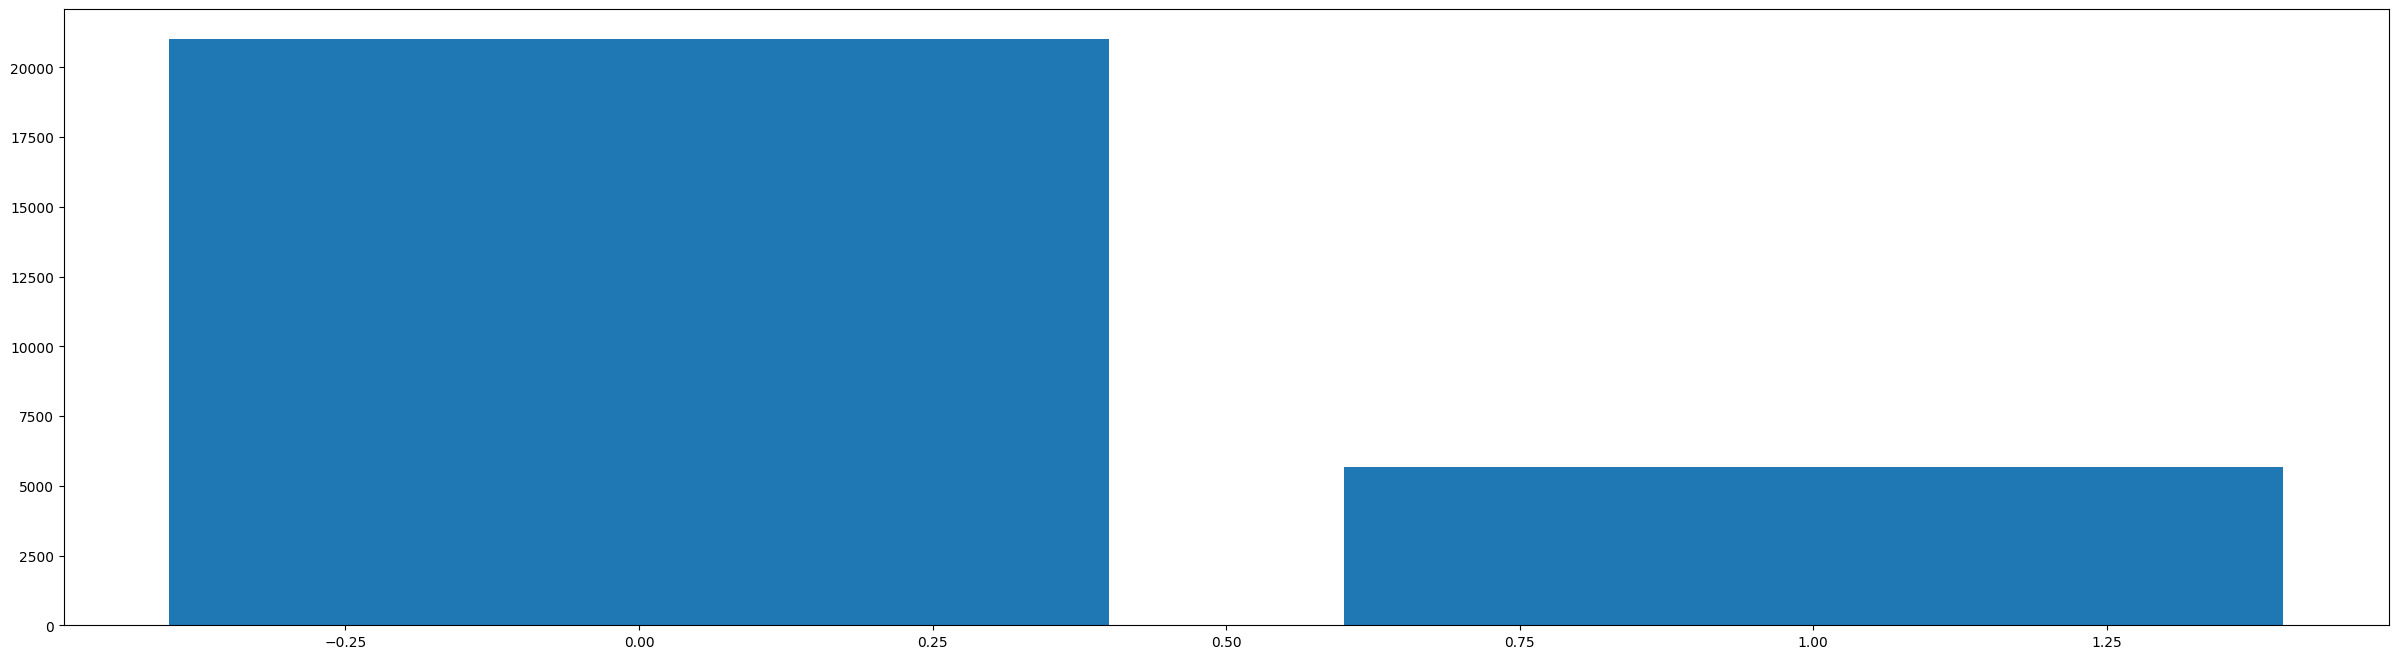

In [41]:
plt.figure(figsize=(30,8))
plt.bar(df['xyz_vaccine'].value_counts().index,df['xyz_vaccine'].value_counts().values)

In [42]:
for col in df.columns:
  print(df[col].value_counts())
  print("\n")

respondent_id
0        1
17736    1
17812    1
17811    1
17810    1
        ..
8898     1
8897     1
8896     1
8895     1
26706    1
Name: count, Length: 26707, dtype: int64


xyz_knowledge
1.0    24201
0.0     2506
Name: count, dtype: int64


behavioral_antiviral_meds
0.0    25406
1.0     1301
Name: count, dtype: int64


behavioral_avoidance
1.0    19436
0.0     7271
Name: count, dtype: int64


behavioral_face_mask
0.0    24866
1.0     1841
Name: count, dtype: int64


behavioral_wash_hands
1.0    22057
0.0     4650
Name: count, dtype: int64


behavioral_large_gatherings
0.0    17160
1.0     9547
Name: count, dtype: int64


behavioral_outside_home
0.0    17726
1.0     8981
Name: count, dtype: int64


behavioral_touch_face
1.0    18129
0.0     8578
Name: count, dtype: int64


doctor_recc_xyz
0.0    21299
1.0     5408
Name: count, dtype: int64


doctor_recc_seasonal
0.0    18613
1.0     8094
Name: count, dtype: int64


chronic_med_condition
0.0    19417
1.0     7290
Name: count, dtype:

In [43]:
for cols in df_test.columns:
  print(df_test[cols].value_counts())
  print("\n")

respondent_id
26707    1
44444    1
44520    1
44519    1
44518    1
        ..
35605    1
35604    1
35603    1
35602    1
53414    1
Name: count, Length: 26708, dtype: int64


xyz_knowledge
1.0    24266
0.0     2442
Name: count, dtype: int64


behavioral_antiviral_meds
0.0    25386
1.0     1322
Name: count, dtype: int64


behavioral_avoidance
1.0    19549
0.0     7159
Name: count, dtype: int64


behavioral_face_mask
0.0    24859
1.0     1849
Name: count, dtype: int64


behavioral_wash_hands
1.0    22070
0.0     4638
Name: count, dtype: int64


behavioral_large_gatherings
0.0    17345
1.0     9363
Name: count, dtype: int64


behavioral_outside_home
0.0    17729
1.0     8979
Name: count, dtype: int64


behavioral_touch_face
1.0    18302
0.0     8406
Name: count, dtype: int64


doctor_recc_xyz
0.0    21242
1.0     5466
Name: count, dtype: int64


doctor_recc_seasonal
0.0    18520
1.0     8188
Name: count, dtype: int64


chronic_med_condition
0.0    19464
1.0     7244
Name: count, dtype:

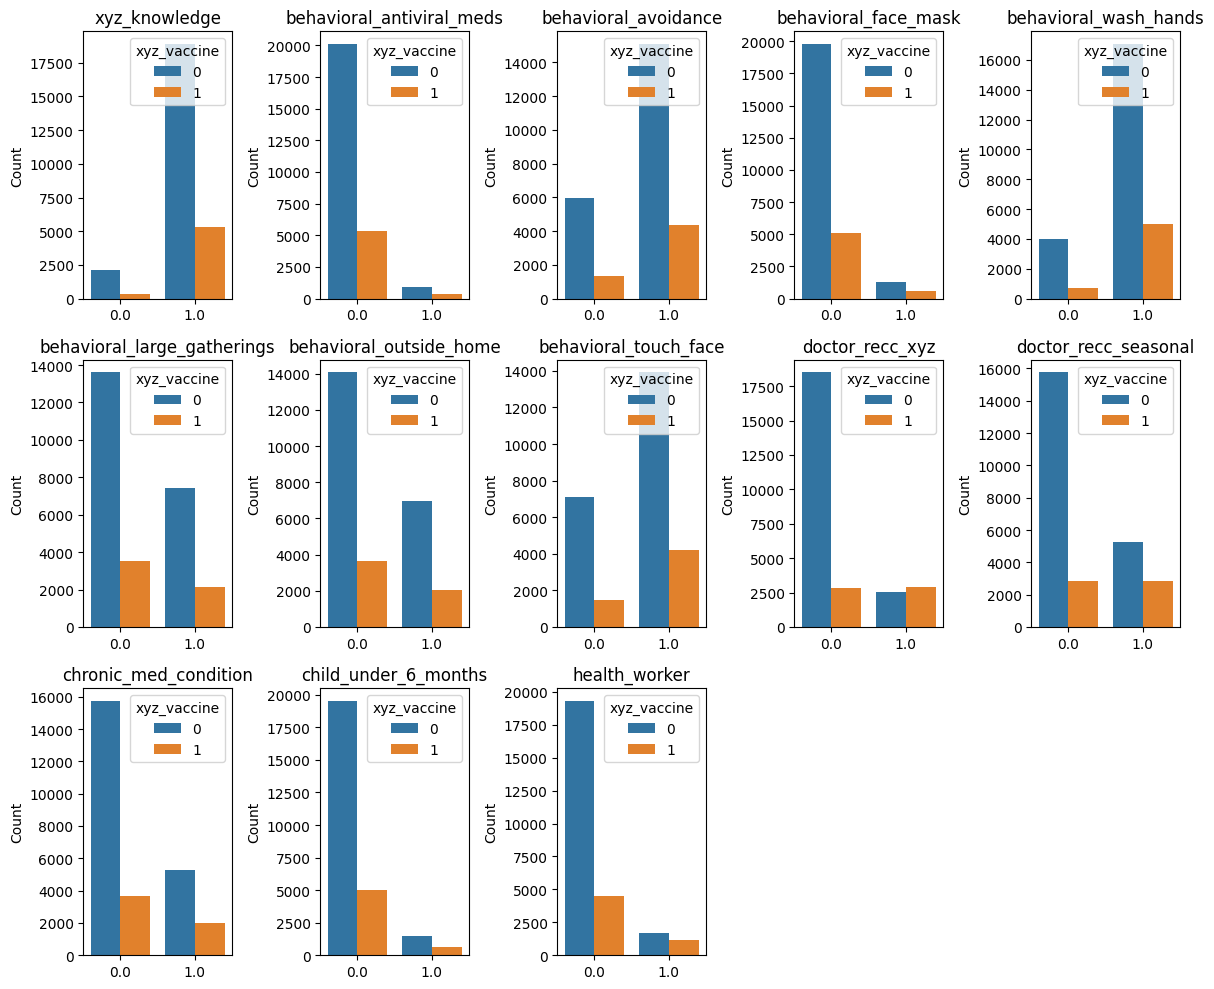

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Subset of the dataset containing binary variables
binary_data = df.iloc[:, 1:14]

# Plotting bar plots for each binary variable
plt.figure(figsize=(12, 10))
for i, col in enumerate(binary_data.columns):
    plt.subplot(3, 5, i + 1)
    sns.countplot(x=col, data=df,hue="xyz_vaccine")
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


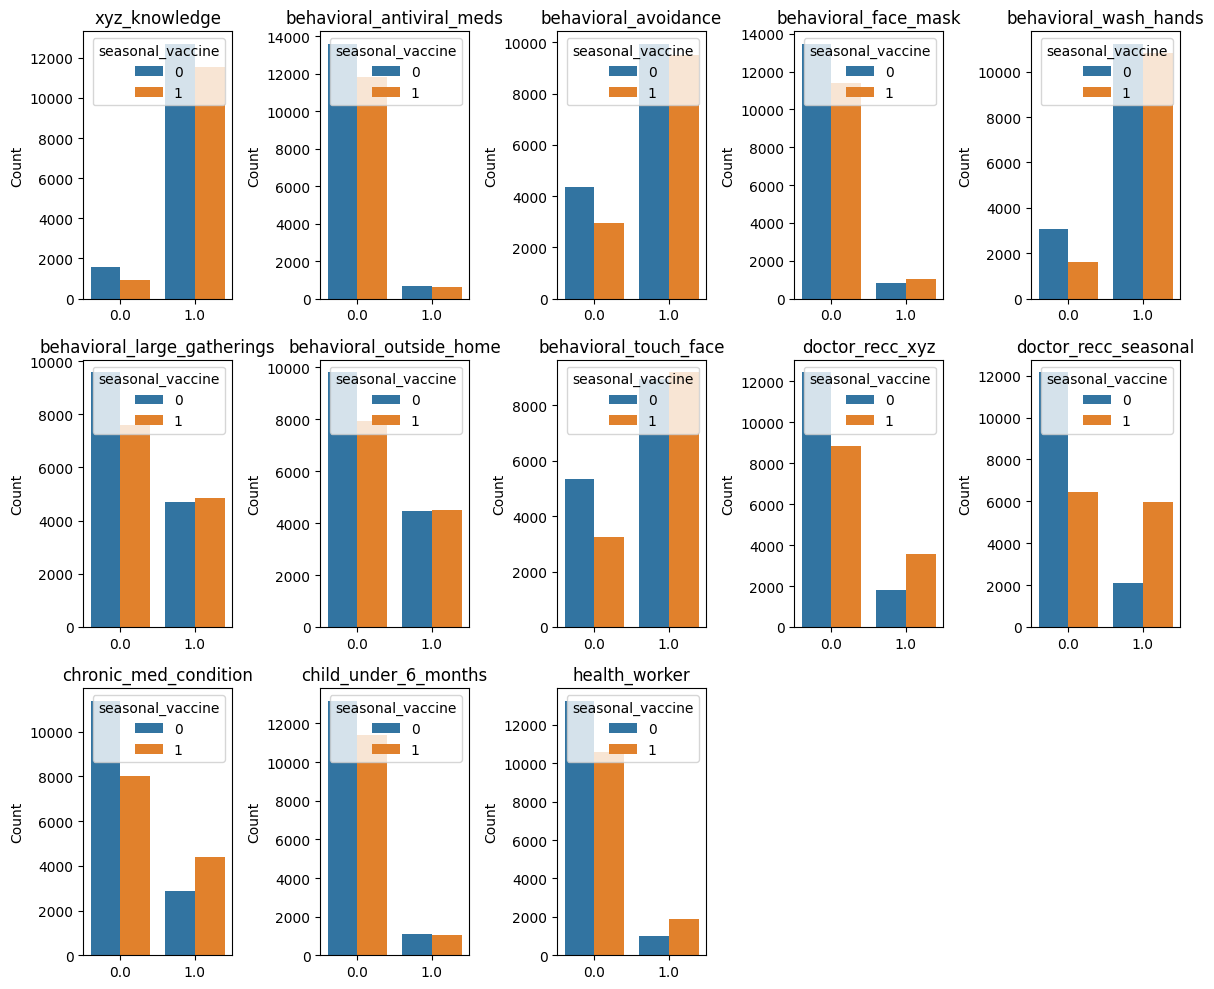

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Subset of the dataset containing binary variables
binary_data = df.iloc[:, 1:14]

# Plotting bar plots for each binary variable
plt.figure(figsize=(12, 10))
for i, col in enumerate(binary_data.columns):
    plt.subplot(3, 5, i + 1)
    sns.countplot(x=col, data=df,hue="seasonal_vaccine")
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


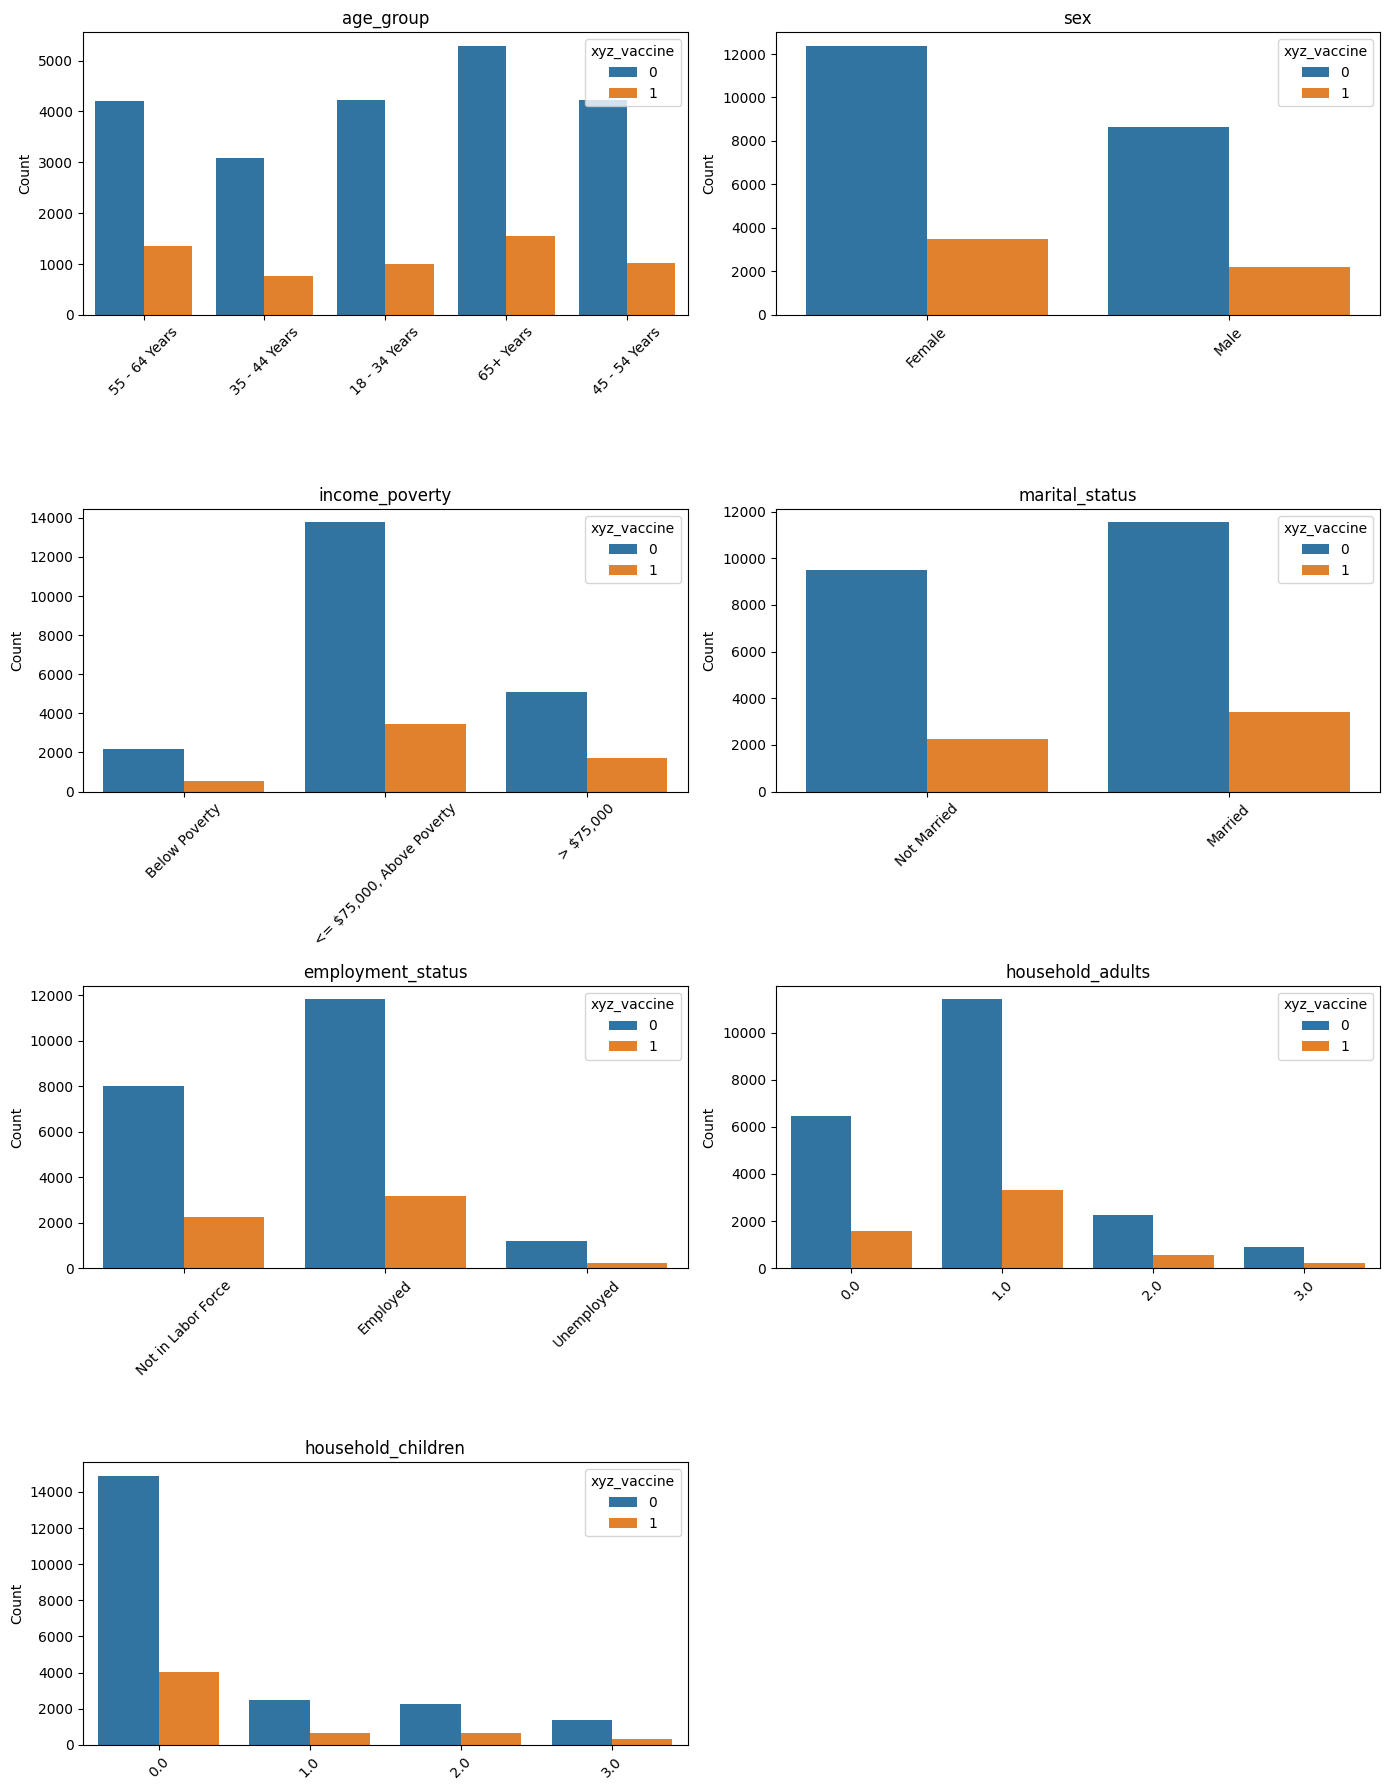

In [46]:
# Subset of the dataset containing categorical variables
cat_data = df[['age_group', 'sex', 'income_poverty', 'marital_status', 'employment_status', 'household_adults', 'household_children']]

# Plotting bar plots for each categorical variable
plt.figure(figsize=(14, 18))
for i, col in enumerate(cat_data.columns):
    plt.subplot(4, 2, i + 1)
    sns.countplot(x=col, data=df,hue="xyz_vaccine")
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


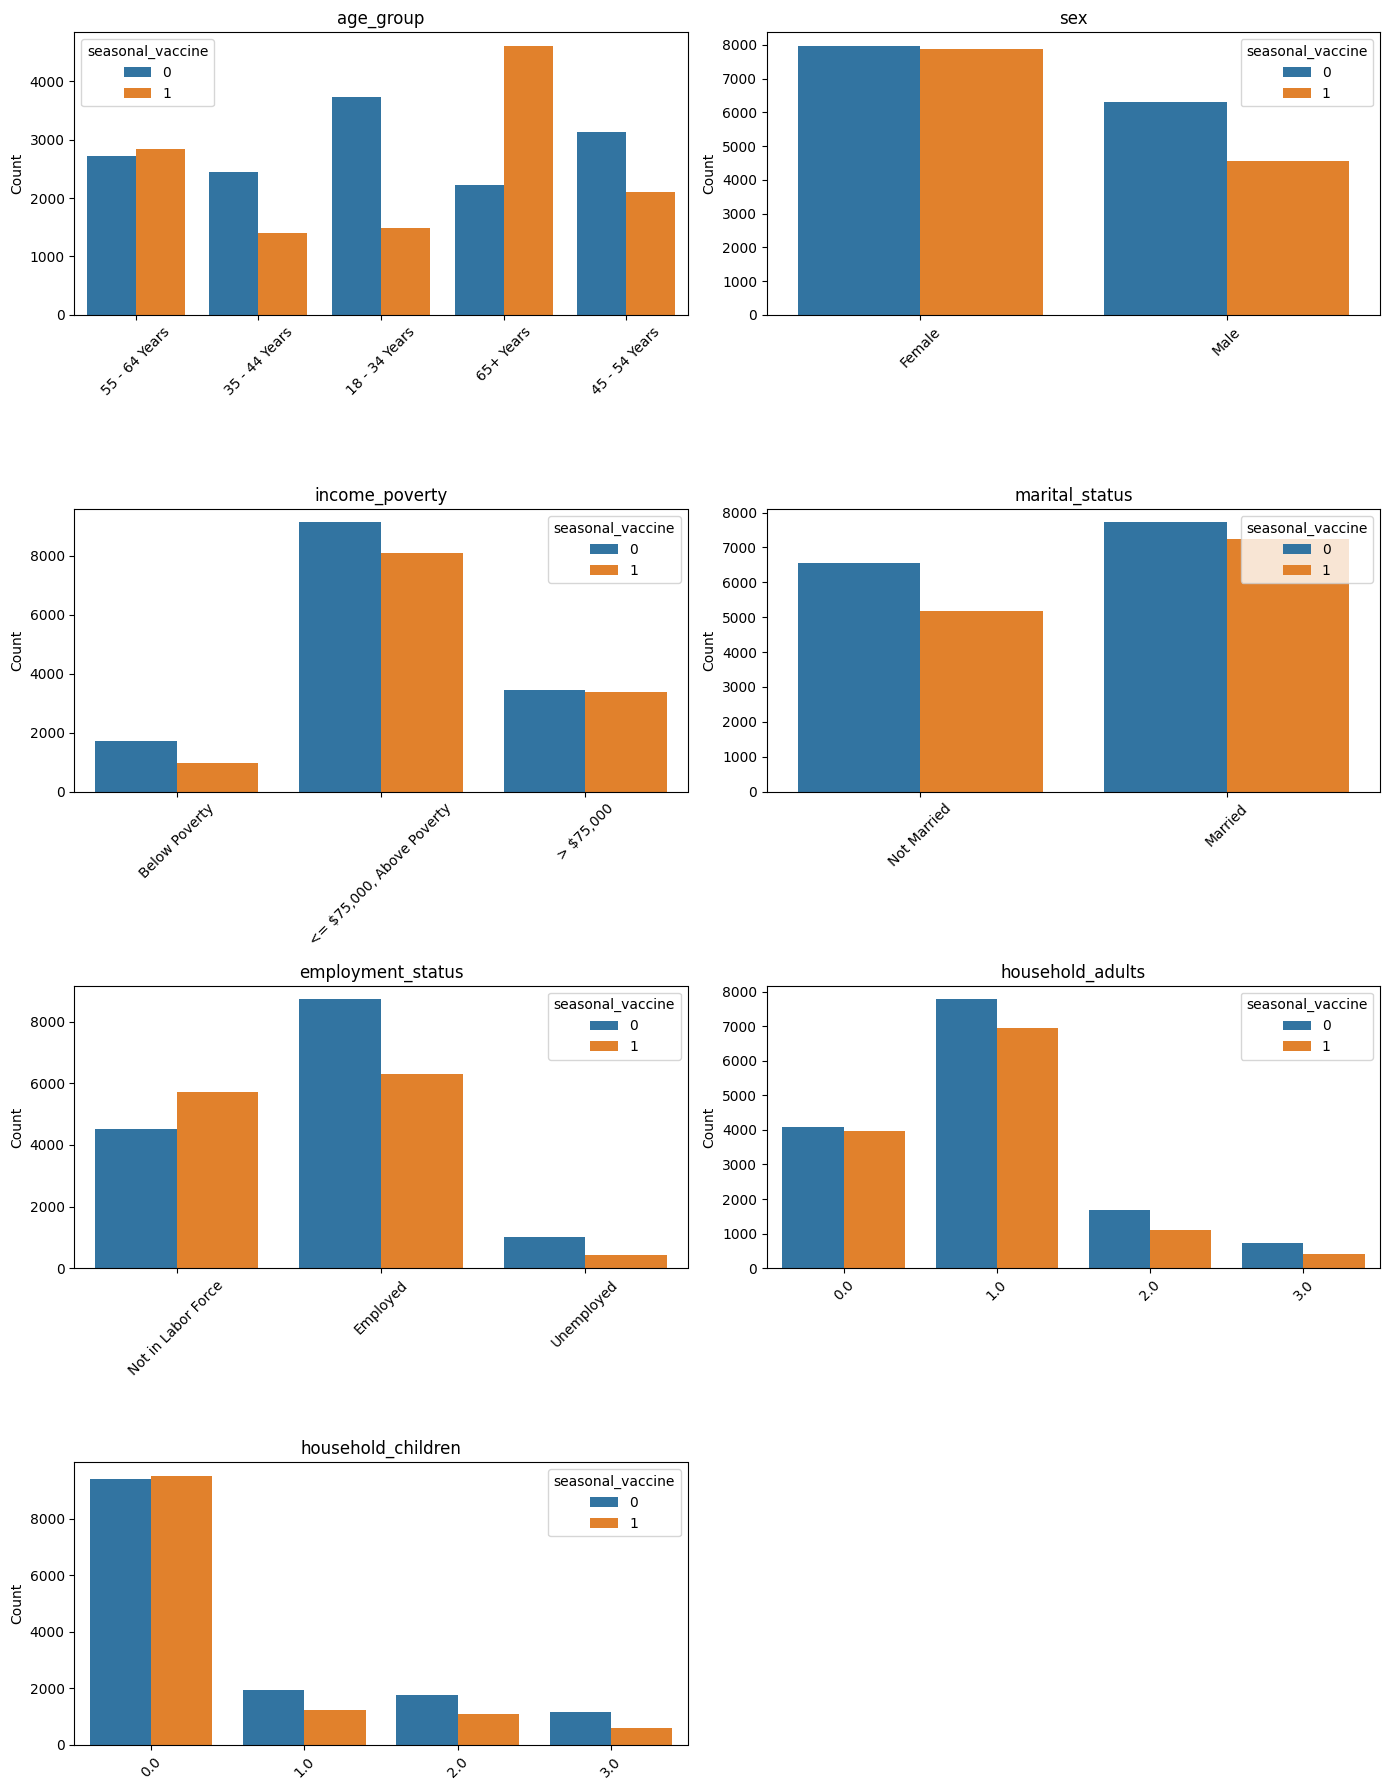

In [47]:
# Subset of the dataset containing categorical variables
cat_data = df[['age_group', 'sex', 'income_poverty', 'marital_status', 'employment_status', 'household_adults', 'household_children']]

# Plotting bar plots for each categorical variable
plt.figure(figsize=(14, 18))
for i, col in enumerate(cat_data.columns):
    plt.subplot(4, 2, i + 1)
    sns.countplot(x=col, data=df,hue="seasonal_vaccine")
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [48]:
df.columns


Index(['respondent_id', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective',
       'opinion_seas_vacc_effective', 'age_group', 'sex', 'income_poverty',
       'marital_status', 'employment_status', 'census_msa', 'household_adults',
       'household_children', 'mean_opinion_xyz_risk_sick',
       'mean_opinion_seas_risk_sick', 'xyz_vaccine', 'seasonal_vaccine'],
      dtype='object')

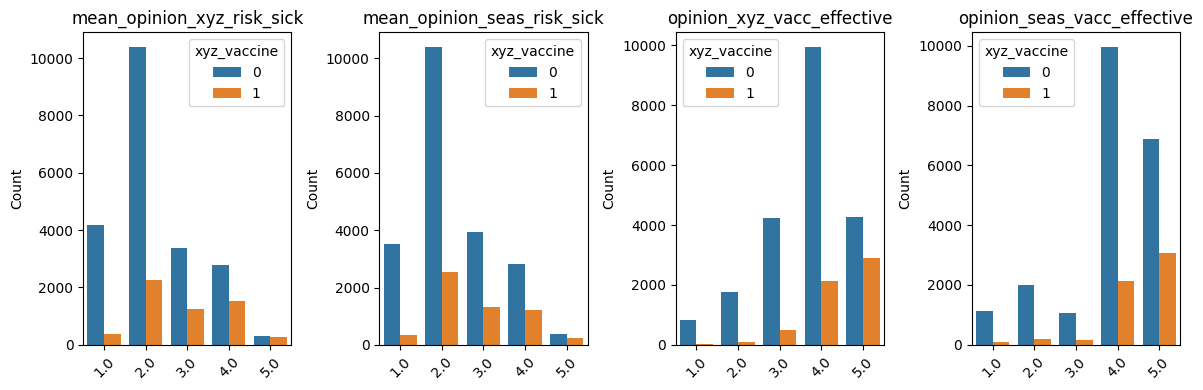

In [49]:

col_rating_type = ['mean_opinion_xyz_risk_sick',
                   'mean_opinion_seas_risk_sick',
                   'opinion_xyz_vacc_effective',
                   'opinion_seas_vacc_effective']

# Assuming df and "xyz_vaccine" are defined elsewhere

plt.figure(figsize=(12, 4))  # Adjust the figure size as needed

for i in range(4):
    plt.subplot(1, 4, i + 1)  # Corrected subplot indexing
    sns.countplot(x=col_rating_type[i], data=df, hue="xyz_vaccine")
    plt.title(col_rating_type[i])
    plt.xlabel('')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


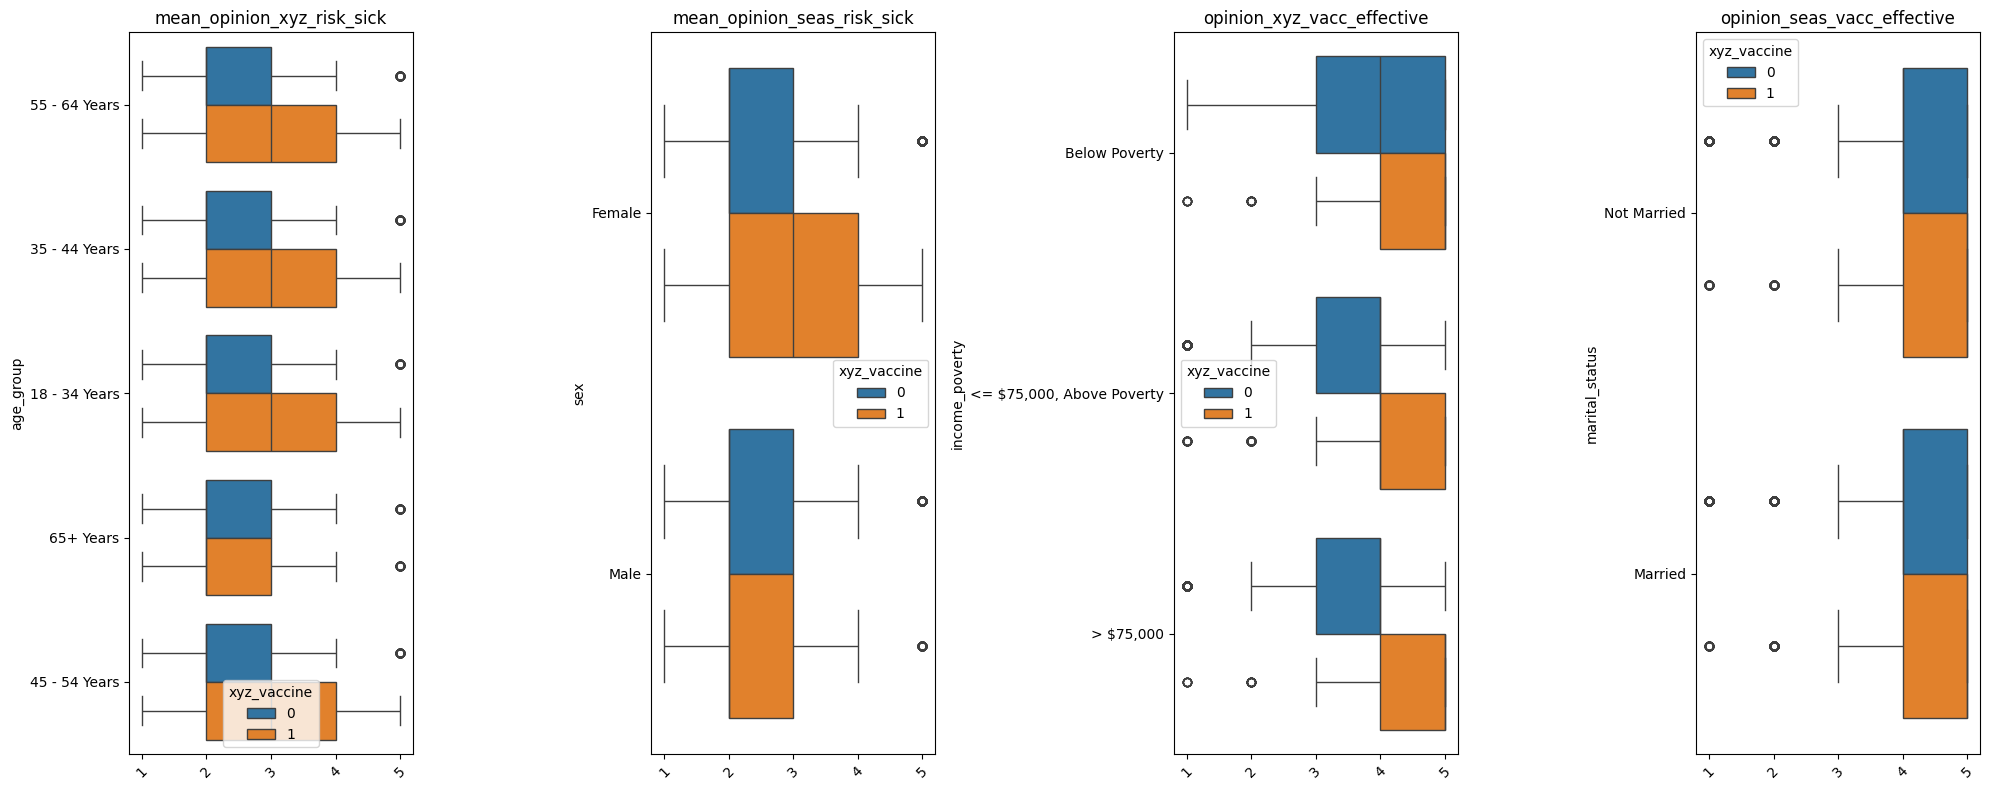

In [50]:
col_rating_type = ['mean_opinion_xyz_risk_sick',
                   'mean_opinion_seas_risk_sick',
                   'opinion_xyz_vacc_effective',
                   'opinion_seas_vacc_effective']
cat_col=['age_group', 'sex', 'income_poverty', 'marital_status', 'employment_status', 'household_adults', 'household_children']

# Assuming df and "xyz_vaccine" are defined elsewhere

plt.figure(figsize=(20,8))  # Adjust the figure size as needed

for i in range(4):
    plt.subplot(1, 4, i + 1)  # Corrected subplot indexing
    sns.boxplot(x=col_rating_type[i],y=cat_col[i], data=df, hue="xyz_vaccine")
    plt.title(col_rating_type[i])
    plt.xlabel('')
    plt.ylabel(cat_col[i])
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


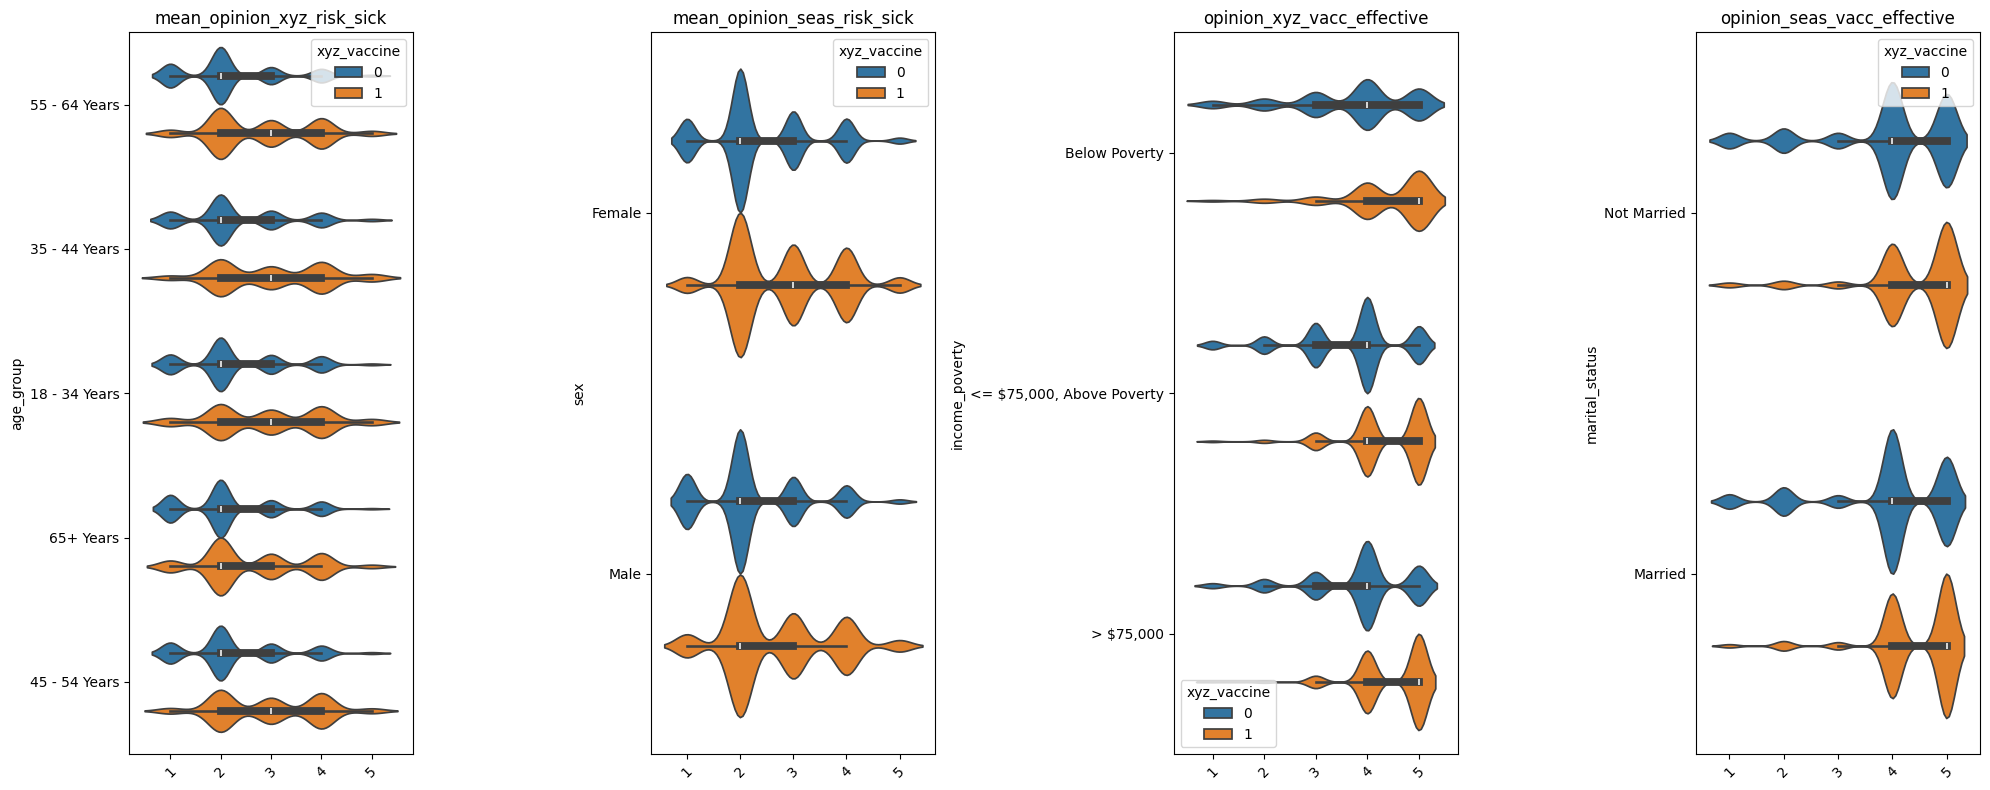

In [51]:
col_rating_type = ['mean_opinion_xyz_risk_sick',
                   'mean_opinion_seas_risk_sick',
                   'opinion_xyz_vacc_effective',
                   'opinion_seas_vacc_effective']
cat_col=['age_group', 'sex', 'income_poverty', 'marital_status', 'employment_status', 'household_adults', 'household_children']

# Assuming df and "xyz_vaccine" are defined elsewhere

plt.figure(figsize=(20,8))  # Adjust the figure size as needed

for i in range(4):
    plt.subplot(1, 4, i + 1)  # Corrected subplot indexing
    sns.violinplot(x=col_rating_type[i],y=cat_col[i], data=df, hue="xyz_vaccine")
    plt.title(col_rating_type[i])
    plt.xlabel('')
    plt.ylabel(cat_col[i])
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [52]:
df["sum_binary_col"]=df.iloc[:,1:15].sum(axis=1)
df_test["sum_binary_col"]=df_test.iloc[:,1:15].sum(axis=1)

In [53]:
from sklearn.preprocessing import LabelEncoder


def encode_categorical_column(column_data):
    le = LabelEncoder()
    encoded_column = le.fit_transform(column_data)
    return encoded_column


age_group_mapping = {
    '18 - 34 Years': 0,
    '35 - 44 Years': 1,
    '45 - 54 Years': 2,
    '55 - 64 Years': 3,
    '65+ Years': 4
}

df['age_group'] = df['age_group'].map(age_group_mapping)


df['sex'] = encode_categorical_column(df['sex'])
df['income_poverty'] = encode_categorical_column(df['income_poverty'])
df['marital_status'] = encode_categorical_column(df['marital_status'])
df['employment_status'] = encode_categorical_column(df['employment_status'])
df['census_msa'] = encode_categorical_column(df['census_msa'])




**ALL NAN VALUES FILLED**

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_knowledge                26707 non-null  float64
 2   behavioral_antiviral_meds    26707 non-null  float64
 3   behavioral_avoidance         26707 non-null  float64
 4   behavioral_face_mask         26707 non-null  float64
 5   behavioral_wash_hands        26707 non-null  float64
 6   behavioral_large_gatherings  26707 non-null  float64
 7   behavioral_outside_home      26707 non-null  float64
 8   behavioral_touch_face        26707 non-null  float64
 9   doctor_recc_xyz              26707 non-null  float64
 10  doctor_recc_seasonal         26707 non-null  float64
 11  chronic_med_condition        26707 non-null  float64
 12  child_under_6_months         26707 non-null  float64
 13  health_worker   

In [55]:





age_group_mapping = {
    '18 - 34 Years': 0,
    '35 - 44 Years': 1,
    '45 - 54 Years': 2,
    '55 - 64 Years': 3,
    '65+ Years': 4
}

df_test['age_group'] = df_test['age_group'].map(age_group_mapping)


df_test['sex'] = encode_categorical_column(df_test['sex'])
df_test['income_poverty'] = encode_categorical_column(df_test['income_poverty'])
df_test['marital_status'] = encode_categorical_column(df_test['marital_status'])
df_test['employment_status'] = encode_categorical_column(df_test['employment_status'])
df_test['census_msa'] = encode_categorical_column(df_test['census_msa'])




In [56]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   xyz_knowledge                26708 non-null  float64
 2   behavioral_antiviral_meds    26708 non-null  float64
 3   behavioral_avoidance         26708 non-null  float64
 4   behavioral_face_mask         26708 non-null  float64
 5   behavioral_wash_hands        26708 non-null  float64
 6   behavioral_large_gatherings  26708 non-null  float64
 7   behavioral_outside_home      26708 non-null  float64
 8   behavioral_touch_face        26708 non-null  float64
 9   doctor_recc_xyz              26708 non-null  float64
 10  doctor_recc_seasonal         26708 non-null  float64
 11  chronic_med_condition        26708 non-null  float64
 12  child_under_6_months         26708 non-null  float64
 13  health_worker   

**MODEL DEVELOPMENT AND TRAINING STARTS **

In [57]:
x_train = pd.concat([df.iloc[:, 1:27], df.iloc[:, [29]]], axis=1)
print(x_train.columns)
y_train=df["xyz_vaccine"]
print(y_train.shape)
print(y_train.values)

Index(['xyz_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective',
       'opinion_seas_vacc_effective', 'age_group', 'sex', 'income_poverty',
       'marital_status', 'employment_status', 'census_msa', 'household_adults',
       'household_children', 'mean_opinion_xyz_risk_sick',
       'mean_opinion_seas_risk_sick', 'sum_binary_col'],
      dtype='object')
(26707,)
[0 0 0 ... 0 0 0]


In [58]:
#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=47)

In [59]:
print(x_train.shape)
print(y_train.shape)



x_test=df_test.iloc[:,1:]
print(x_test.columns)
print(x_train.columns)

print(x_test.shape)



(26707, 27)
(26707,)
Index(['xyz_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective',
       'opinion_seas_vacc_effective', 'age_group', 'sex', 'income_poverty',
       'marital_status', 'employment_status', 'census_msa', 'household_adults',
       'household_children', 'mean_opinion_xyz_risk_sick',
       'mean_opinion_seas_risk_sick', 'sum_binary_col'],
      dtype='object')
Index(['xyz_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'c

In [60]:
from sklearn import svm

from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [61]:
support = svm.LinearSVC(random_state=20)

In [62]:
support.fit(x_train, y_train)
predicted1= support.predict(x_test)


In [63]:
print(predicted1)

[0 0 0 ... 0 0 1]


In [64]:
from sklearn.calibration import CalibratedClassifierCV
calibrated_svc = CalibratedClassifierCV(support)
calibrated_svc.fit(x_train, y_train)

# Predict probabilities
predicted_proba = calibrated_svc.predict_proba(x_test)
print(predicted_proba)

[[0.90510323 0.09489677]
 [0.94618689 0.05381311]
 [0.7008857  0.2991143 ]
 ...
 [0.92430084 0.07569916]
 [0.92039441 0.07960559]
 [0.336422   0.663578  ]]


In [65]:
predicted_labels = np.max(predicted_proba, axis=1)
print(predicted_labels)

[0.90510323 0.94618689 0.7008857  ... 0.92430084 0.92039441 0.663578  ]


In [66]:
y_train2=df['seasonal_vaccine']

In [67]:
support2=svm.LinearSVC(random_state=20)

In [68]:
support2.fit(x_train, y_train2)
predicted2= support2.predict(x_test)
print(predicted2)

[0 0 1 ... 0 0 0]


In [69]:

calibrated_svc2 = CalibratedClassifierCV(support2)
calibrated_svc2.fit(x_train, y_train2)

# Predict probabilities
predicted_proba2 = calibrated_svc2.predict_proba(x_test)
print(predicted_proba2)

[[0.69695694 0.30304306]
 [0.95500149 0.04499851]
 [0.32989826 0.67010174]
 ...
 [0.87268125 0.12731875]
 [0.65951474 0.34048526]
 [0.50905322 0.49094678]]


**CONSIDERING THE MAXIMUM PROBABILITY OUT OF BOTH(FOR 0,1) TO BE FIAL PROBABILITY**

In [70]:
predicted_labels2 = np.max(predicted_proba2, axis=1)
print(predicted_labels2)

[0.69695694 0.95500149 0.67010174 ... 0.87268125 0.65951474 0.50905322]


In [71]:
predicted_labels=list(predicted_labels)

In [72]:
predicted_labels2=list(predicted_labels2)

In [73]:
respondent_id=list(range(26707,53415))

**BELOW IS THE SUBMISSION FORMAT DATAFRAME --> final_df**

In [74]:
final_df=pd.DataFrame({
    'respondent_id': respondent_id,
    'xyz_vaccine': predicted_labels,
    'seasonal_vaccine':predicted_labels2})

In [75]:
print(final_df)

       respondent_id  xyz_vaccine  seasonal_vaccine
0              26707     0.905103          0.696957
1              26708     0.946187          0.955001
2              26709     0.700886          0.670102
3              26710     0.518612          0.840881
4              26711     0.664973          0.508530
...              ...          ...               ...
26703          53410     0.599599          0.559866
26704          53411     0.873131          0.690931
26705          53412     0.924301          0.872681
26706          53413     0.920394          0.659515
26707          53414     0.663578          0.509053

[26708 rows x 3 columns]


**STORING ALL FINAL DATSETS IN DRIVE FOLDER**
**IT CONSISTS THE FINAL PRE-PROCEESED TRAINING AND TESTING FEATURES ALONG WITH PREDICTED PROBABILITIES FILE**

In [81]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [82]:
final_df.to_csv('sub_file.csv')
!cp sub_file.csv "drive/My Drive/"

In [83]:
df.to_csv('preproccesed_training_set_features_file.csv')
!cp preproccesed_training_set_features_file.csv "drive/My Drive/"

In [84]:
df_test.to_csv("preprocessed_test_set_features_file.csv")
!cp preprocessed_test_set_features_file.csv "drive/My Drive/"